In [109]:
import numpy as np

In [110]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

In [111]:
import itertools

In [112]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [113]:
import mdtraj as md

# Dilute boxes

In [183]:
data = np.loadtxt("lj_binding_equil.csv", delimiter=',')

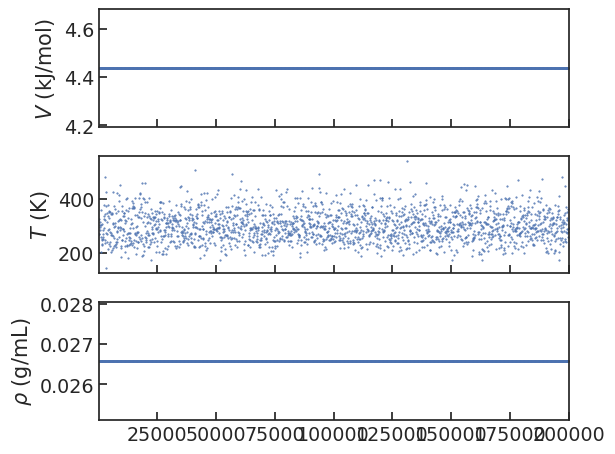

In [184]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=False)
ax[0].plot(data[:,0], data[:,1], '.', ms=1)
#ax[0].set_ylim(-30000,200)
ax[0].set_ylabel(r'$V$ (kJ/mol)')

ax[1].plot(data[:,0], data[:,2], '.', ms=1)
#ax[1].set_ylim(250,350)
ax[1].set_ylabel(r'$T$ (K)')

ax[2].plot(data[:,0], data[:,3], '.', ms=1)
ax[2].set_ylabel(r'$\rho$ (g/mL)')
ax[2].set_xlim(data[0,0], data[-1,0])
plt.tight_layout()

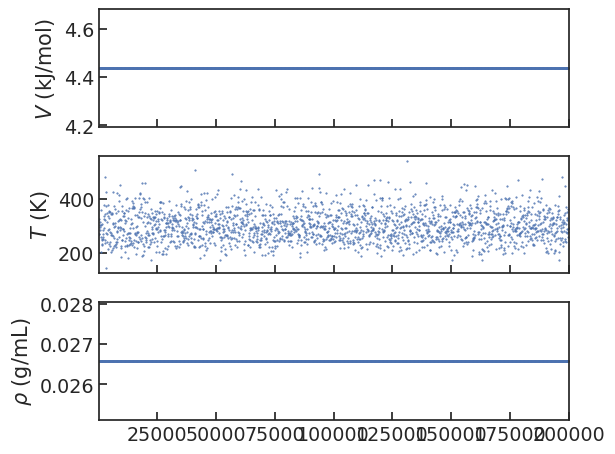

In [185]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=False)
ax[0].plot(data[:,0], data[:,1], '.', ms=1)
#ax[0].set_ylim(-30000,200)
ax[0].set_ylabel(r'$V$ (kJ/mol)')

ax[1].plot(data[:,0], data[:,2], '.', ms=1)
#ax[1].set_ylim(250,350)
ax[1].set_ylabel(r'$T$ (K)')

ax[2].plot(data[:,0], data[:,3], '.', ms=1)
ax[2].set_ylabel(r'$\rho$ (g/mL)')
ax[2].set_xlim(data[0,0], data[-1,0])
plt.tight_layout()

In [186]:
data = np.loadtxt("lj_binding_prod.csv", delimiter=',')

In [187]:
traj = md.load_dcd("lj_binding_prod.dcd", top="lj_binding_min.pdb", stride=1)

In [211]:
bins, g_r = md.compute_rdf(traj, list(itertools.combinations(range(20), 2)), \
                               r_range=[1,25], n_bins=200)

/tmp/ipykernel_6724/1872191056.py:4: RuntimeWarning: divide by zero encountered in log
  axt.plot(bins, -np.log(g_r), color='C1')


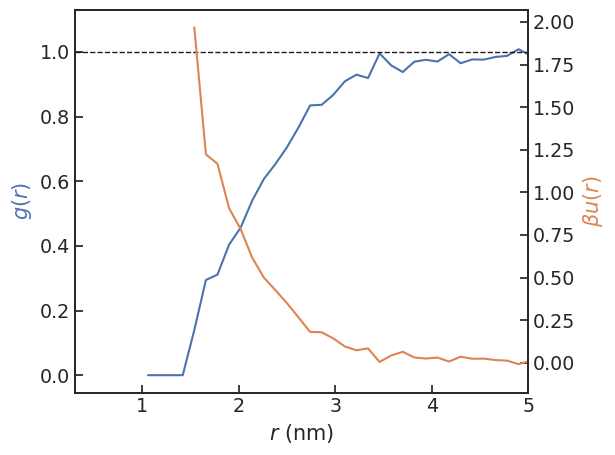

In [212]:
fig, ax = plt.subplots()
ax.plot(bins, g_r)
axt = ax.twinx()
axt.plot(bins, -np.log(g_r), color='C1')
ax.axhline(1,0,2,ls='dashed', lw=1, color='k')
ax.set_xlim(0.3,5)
ax.set_xlabel('$r$ (nm)')
ax.set_ylabel(r'$g(r)$', color='C0')
axt.set_ylabel(r'$\beta u(r)$', color='C1')
plt.tight_layout()

In [213]:
distances = md.compute_distances(traj, \
                                atom_pairs=list(itertools.combinations(range(20), 2)))

In [214]:
ldist = len(list(itertools.combinations(range(20), 2)))

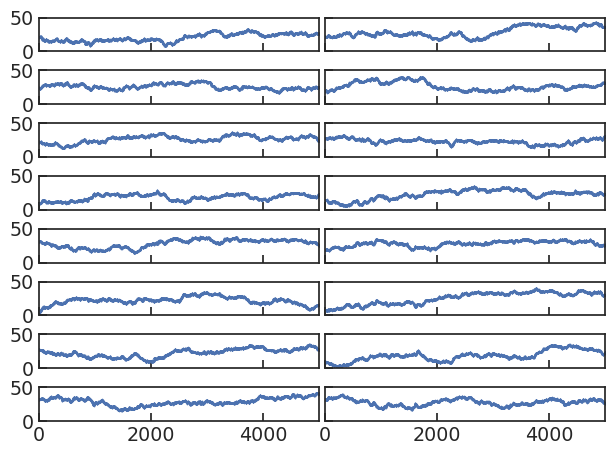

In [222]:
fig, ax = plt.subplots(8,2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ldist)[:16]:
    ax[i].plot(traj.time, distances[:,i], '.', ms=0.5)
ax[i].set_xlim(0,5000); ax[i].set_ylim(0,50)
plt.tight_layout(w_pad=0, h_pad=0)

In [218]:
nbins = 100
hist, bin_edges = np.histogram(np.concatenate(distances), density=True, bins=np.linspace(0,30,nbins))
bin_centers = np.array([0.5*(bin_edges[i]+bin_edges[i+1]) for i in range(nbins-1)])

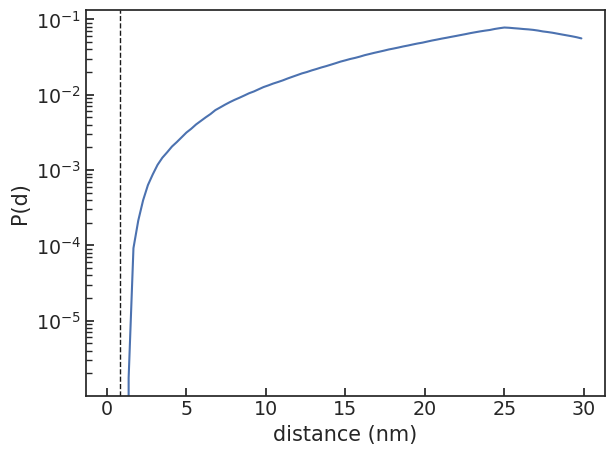

In [220]:
fig, ax = plt.subplots()
ax.plot(bin_centers, hist)
ax.axvline(0.8,0,1, ls='dashed', color='k', lw=1)
ax.set_xlabel('distance (nm)')
ax.set_ylabel('P(d)')
ax.set_yscale('log')
#ax.set_ylim(1e-3,1); ax.set_xlim(0,9)
plt.tight_layout()

In [182]:
ibound = np.argmin(np.abs(bin_centers - 0.8))
pb = np.trapz(hist[:ibound], dx=bin_centers[1]-bin_centers[0])
print ('Population bound = %e'%pb)

Population bound = 3.083500e-03


# Dense phases

In [223]:
data = np.loadtxt("data/methane_T100_equil.csv", delimiter=',')

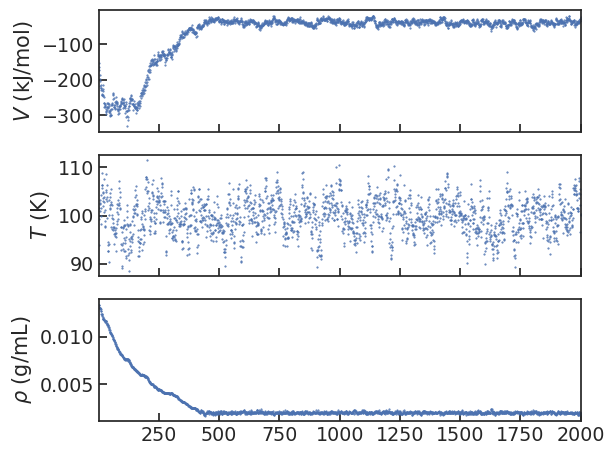

In [224]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=False)
ax[0].plot(data[:,0], data[:,1], '.', ms=1)
#ax[0].set_ylim(-30000,200)
ax[0].set_ylabel(r'$V$ (kJ/mol)')

ax[1].plot(data[:,0], data[:,2], '.', ms=1)
#ax[1].set_ylim(250,350)
ax[1].set_ylabel(r'$T$ (K)')

ax[2].plot(data[:,0], data[:,3], '.', ms=1)
ax[2].set_ylabel(r'$\rho$ (g/mL)')
ax[2].set_xlim(data[0,0], data[-1,0])
plt.tight_layout()

In [225]:
data = np.loadtxt("data/methane_T100_prod.csv", delimiter=',')

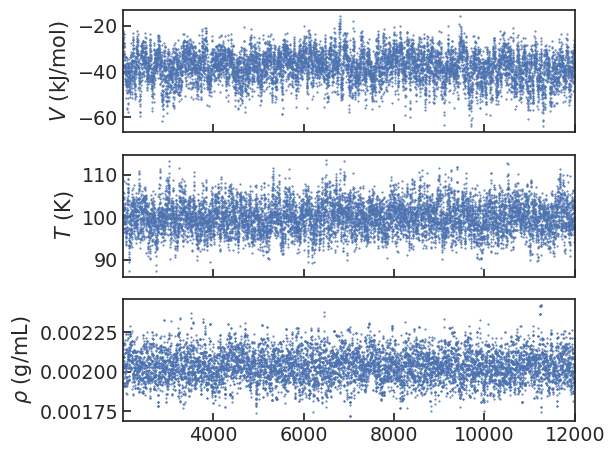

In [226]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=False)
ax[0].plot(data[:,0], data[:,1], '.', ms=1)
#ax[0].set_ylim(-20000,-10000)
ax[0].set_ylabel(r'$V$ (kJ/mol)')

ax[1].plot(data[:,0], data[:,2], '.', ms=1)
#ax[1].set_ylim(250,350)
ax[1].set_ylabel(r'$T$ (K)')

ax[2].plot(data[:,0], data[:,3], '.', ms=1)
ax[2].set_ylabel(r'$\rho$ (g/mL)')
#ax[2].set_ylim(0,1500)
ax[2].set_xlim(data[0,0], data[-1,0])
plt.tight_layout()

In [63]:
 traj = md.load_dcd("lj_single_prod.dcd", top="lj_single_min.pdb", stride=50)

In [64]:
bins, g_r = md.compute_rdf(traj, list(itertools.combinations(range(1000), 2)), \
                               r_range=[0,2.5], n_bins=100)

/tmp/ipykernel_6724/787614053.py:4: RuntimeWarning: divide by zero encountered in log
  axt.plot(bins, -np.log(g_r), color='C1')


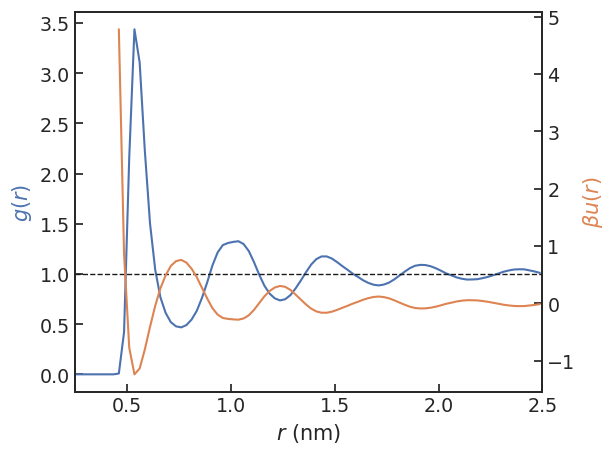

In [65]:
fig, ax = plt.subplots()
ax.plot(bins, g_r)
axt = ax.twinx()
axt.plot(bins, -np.log(g_r), color='C1')
ax.axhline(1,0,2,ls='dashed', lw=1, color='k')
ax.set_xlim(0.25,2.5)
ax.set_xlabel('$r$ (nm)')
ax.set_ylabel(r'$g(r)$', color='C0')
axt.set_ylabel(r'$\beta u(r)$', color='C1')
plt.tight_layout()
